In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('/kaggle/input/financial-dataset/Finance_Final.xlsx')
df2 = pd.read_excel('/kaggle/input/financial-complain/Complain.xlsx')
df3 = pd.read_excel('/kaggle/input/financial-dataset/Finance (1).xlsx', sheet_name='Sheet4')
df1.shape, df2.shape, df3.shape

((11567, 5), (6280, 7), (11567, 5))

In [3]:
df1.head()

,Serial,Reviews,Sentiment,selected_text,Emotion
0,0,unitech q3 profit down by at rs 82 crore,negative,dowprofit down by at rs 82 crore,sad
1,1,risk reward not favourable for tata motors,negative,not favourable,sad
2,2,debt is going to be a drag on deccan chronicle...,negative,drag on deccan,sad
3,3,jewellery stocks rally about as gold prices f...,negative,fall sharply,sad
4,4,china agricultural bank sells billion debut ...,negative,sells billion debut green bond,sad


In [4]:
df3.head()

,Serial,Reviews,Sentiment,selected_text,Emotion
0,0,unitech q3 profit down by at rs 82 crore,negative,dowprofit down by at rs 82 crore,sad
1,1,risk reward not favourable for tata motors,negative,not favourable,sad
2,2,debt is going to be a drag on deccan chronicle...,negative,drag on deccan,sad
3,3,jewellery stocks rally about as gold prices f...,negative,fall sharply,sad
4,4,china agricultural bank sells billion debut ...,negative,sells billion debut green bond,sad


In [5]:
df2.head()

,Domain,Complaint/ Opinion,Complaint Label,Complaint_Cause,Severity level,Sentiment,Emotion
0,Transaction Fail,Can someone tell me if transaction fail betwee...,1,transaction fail between merchant and Bank due...,No explicit reproach,negative,sadness
1,Transaction Fail,@LICIndiaForever @Paytmcare @Paytm As part of ...,1,balance deducted but payment status shows fail,No explicit reproach,negative,sadness
2,Transaction Fail,@ICICIBank_Care This is something very serious...,1,not able to use imobile app,No explicit reproach,negative,anger
3,Transaction Fail,@RBI @ICICIBank_Care @ICICIBank @CRED_support ...,1,payment seems a fraud transaction,Blame,negative,anger
4,Transaction Fail,Fraud transaction through CRED for SBI C-Card ...,1,Fraud transaction through CRED,Accusation,negative,surprise


In [6]:
df1['Reviews'].iloc[0], \
df1['selected_text'].iloc[0]

('unitech q3 profit down by  at rs 82 crore',
 'dowprofit down by  at rs 82 crore')

In [7]:
df1['Reviews'].iloc[1], \
df1['selected_text'].iloc[1]

('risk reward not favourable for tata motors', 'not favourable')

In [8]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load the dataset
# reviews = df1['Reviews'].to_list()
# causes = df1['selected_text'].to_list()

# # Convert the text data into numerical features
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(reviews)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, causes, test_size=0.2, random_state=42)

# # Train a logistic regression model
# clf = LogisticRegression()
# clf.fit(X_train, y_train)

# # Evaluate the model's performance
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)



In [9]:
# idx = 3
# sentence = df1['Reviews'].iloc[idx]
# features = vectorizer.transform([sentence])

# cause = clf.predict(features)[0]

# print('Cause:', cause)
# print(sentence)
# print(df1['selected_text'].iloc[idx])

## Data Preprocessing

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [11]:
df1=df3

In [12]:
print(df1['Sentiment'].unique())
df1['Sentiment'] = label_encoder.fit_transform(df1['Sentiment'])
print(df1['Sentiment'].unique())

['negative' 'neutral' 'positive']
[0 1 2]


In [13]:
print(df1['Emotion'].unique())
df1['Emotion'] = label_encoder.fit_transform(df1['Emotion'])
print(df1['Emotion'].unique())

['sad' 'relief' 'happy' 'disgust' 'confused']
[4 3 2 1 0]


In [14]:
df1['Emotion'].value_counts()

Emotion
2    4471
4    2715
1    1720
0    1347
3    1314
Name: count, dtype: int64

In [15]:
df1['Sentiment'].value_counts()

Sentiment
2    4763
1    4214
0    2590
Name: count, dtype: int64

In [16]:
df1.isna().sum()

Serial           0
Reviews          0
Sentiment        0
selected_text    0
Emotion          0
dtype: int64

In [17]:
df1.reset_index(drop=True, inplace=True)

In [18]:
df1['selected_text'].value_counts()

selected_text
no-cause                                                      4214
down                                                            81
nifty                                                           77
weak                                                            76
decline                                                         52
                                                              ... 
Friendly buying lifts FCS Soft on acquisition buzz.              1
Should fare better in 16.                                        1
Entertainment rallies on market debut.                           1
Defence-related companies gain as government approves FDI.       1
A "to Yes Bank perpetual bonds."                                 1
Name: count, Length: 4145, dtype: int64

In [19]:
!pip install neattext nlpaug 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 15.0 MB/s eta 0:00:00


In [20]:
import torch
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from sklearn.model_selection import train_test_split
import re
import neattext.functions as nfx
import string
import unicodedata
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # for lemmatization 

In [22]:
def pretreatment(text, lang='english', keepStopWords=set(), stem=True, lemma=False, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    #Make text lowercase
    text = text.lower()
    #Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
#     Remove links
#     text = nfx.remove_urls(text)
    # Remove emojis
    text = nfx.remove_emojis(text)
    # Remove hastags
#     text = nfx.remove_hashtags(text)
#     text = nfx.remove_html_tags(text)
    # Remove Stopwords
#     text = nfx.remove_stopwords(text)
#     Remove multiple Spaces
    text = nfx.remove_multiple_spaces(text)
    # Remove userhandles
    text = nfx.remove_userhandles(text)
    #Remove punctuations
    punc = string.punctuation  # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    punc += '\n\r\t'
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))
    #Remove numbers
    text = re.sub('[0-9]+', '', text)
    #Removal of accents and non-standard characters
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    
    #Lemmatization
    if lemma :
        tokens = word_tokenize(text)
        doc = nlp(" ".join(tokens)) 
        text = ' '.join([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    #Stemming    
    if stem :
        stemmer = SnowballStemmer(lang)
        tokens = word_tokenize(text)
        text = ' '.join([stemmer.stem(item) for item in tokens])
    
    #Remove stop words
#     stopwords_list = set(stopwords.words(lang)) - keepStopWords
#     words = word_tokenize(text)
#     text = ' '.join([word for word in words if word not in stopwords_list])
    
    return text

In [23]:
df1['Reviews'].iloc[0], \
pretreatment(df1['Reviews'].iloc[0], keepStopWords=None, stem=False, lemma=False), \
df1['selected_text'].iloc[0]

('unitech q3 profit down by  at rs 82 crore',
 'unitech q profit down by at rs  crore',
 'dowprofit down by  at rs 82 crore')

In [24]:
df1['Reviews'].iloc[2], \
pretreatment(df1['Reviews'].iloc[2], keepStopWords=None, stem=False, lemma=False), \
df1['selected_text'].iloc[2]

('debt is going to be a drag on deccan chronicle  angel broking',
 'debt is going to be a drag on deccan chronicle angel broking',
 'drag on deccan')

In [25]:
# from transformers import AutoModelWithLMHead, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = AutoModelWithLMHead.from_pretrained("ProsusAI/finbert")

# def summarize(text, max_length=150):
#     input_ids = tokenizer.encode(text, return_tensors="pt", add_special_tokens=True)

#     generated_ids = model.generate(input_ids=input_ids, num_beams=2, max_length=max_length,  repetition_penalty=2.5, length_penalty=2.0, early_stopping=True, min_length=2)

#     preds = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in generated_ids]

#     return preds[0]


In [26]:
# idx = 2
# summarize(df1['Reviews'].iloc[idx], max_length=20), \
# df1['Reviews'].iloc[idx], \
# df1['selected_text'].iloc[idx]

In [27]:
# keep_words = {'not', 'could', 'would'} # Can be useful in sentiment Analysis
df1['Reviews_clean'] =  df1['Reviews'].apply(pretreatment, keepStopWords=None, stem=False, lemma=True)


In [28]:
df1['selected_text'].iloc[0]

'dowprofit down by  at rs 82 crore'

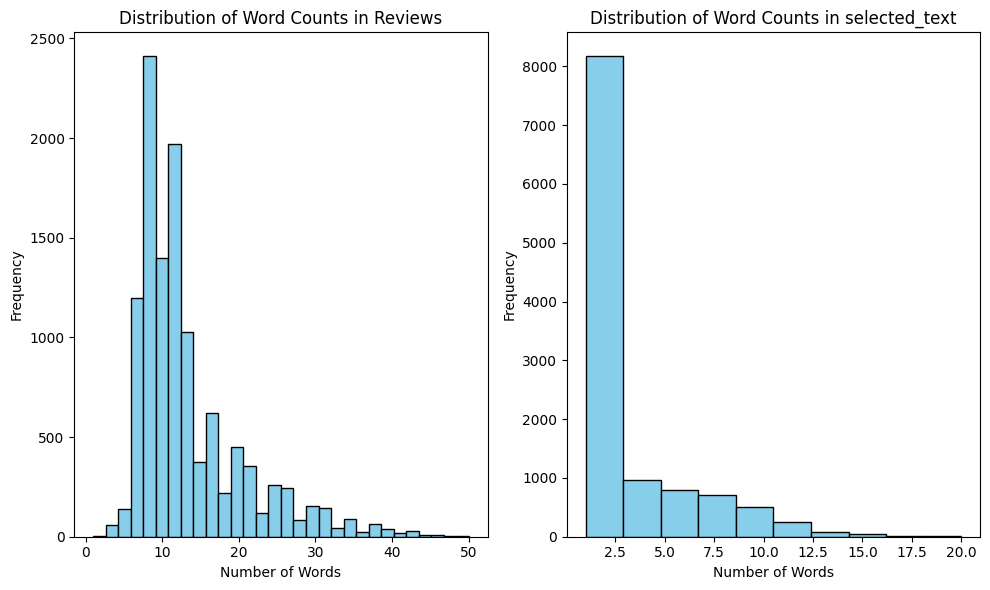

In [29]:
import matplotlib.pyplot as plt

# Plotting side by side using subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create a figure with 1 row and 3 columns

# Plotting the first histogram
word_counts = df1['Reviews'].apply(lambda x: len(x.split()))
axs[0].hist(word_counts, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Word Counts in Reviews')
axs[0].set_xlabel('Number of Words')
axs[0].set_ylabel('Frequency')
axs[0].grid(False)

# # Plotting the second histogram
# word_counts_clean = df1['Reviews_clean'].apply(lambda x: len(x.split()))
# axs[1].hist(word_counts_clean, bins=30, color='skyblue', edgecolor='black')
# axs[1].set_title('Distribution of Word Counts in Cleaned Reviews_clean')
# axs[1].set_xlabel('Number of Words')
# axs[1].set_ylabel('Frequency')
# axs[1].grid(False)

# Plotting the third histogram
word_counts_selected_text = df1['selected_text'].apply(lambda x: len(x.split()))
axs[1].hist(word_counts_selected_text, bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Distribution of Word Counts in selected_text')
axs[1].set_xlabel('Number of Words')
axs[1].set_ylabel('Frequency')
axs[1].grid(False)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [30]:
df1.columns

Index(['Serial', 'Reviews', 'Sentiment', 'selected_text', 'Emotion',
       'Reviews_clean'],
      dtype='object')

In [31]:
df1.rename(columns={"Reviews": "sentences", 'Emotion':'emotion', 'Sentiment':'sentiment'}, inplace=True)

In [32]:
df1.columns

Index(['Serial', 'sentences', 'sentiment', 'selected_text', 'emotion',
       'Reviews_clean'],
      dtype='object')

In [33]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [34]:
# import nlpaug.augmenter.word as naw
# aug_wordnet = naw.SynonymAug(aug_src='wordnet')
# aug_bert = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")


In [35]:

# # Synonym Replacement
# def augment_synonym(sentence):
#     augmented_text = aug_wordnet.augment(sentence)
#     return augmented_text[0]

# # Random Insertion
# def augment_insertion(sentence):
    
#     augmented_text = aug_bert.augment(sentence)
#     return augmented_text[0]

# # Example usage
# original_sentence = df1['sentences'].iloc[0]

# augmented_sentence_synonyms = augment_synonym(original_sentence)
# augmented_sentence_insertion = augment_insertion(original_sentence)

# print("Original Sentence:", original_sentence)
# print("\nAugmented Sentence (Synonym Replacement):", augmented_sentence_synonyms)
# print("\nAugmented Sentence (Random Insertion):", augmented_sentence_insertion)


In [36]:
train_df, test_df = train_test_split(
    df2, test_size=0.2, random_state=42
)

In [37]:

# num_samples_per_class = int(0.8 * max(train_df['emotion'].value_counts()))

# augmented_df = pd.DataFrame(columns=['sentences', 'sentiment', 'emotion'])

# for label in train_df['emotion'].unique():
#     class_data = train_df[train_df['emotion'] == label]
    
#     num_samples_needed = num_samples_per_class - len(class_data)
    
#     if num_samples_needed > 0:
#         augmented_samples = []
        
#         for _, row in class_data.iterrows():
#             original_text = row['sentences']
#             augmented_text = augment_insertion(original_text)
            
#             augmented_samples.append({'sentences': augmented_text, 'sentiment': row['sentiment'], 'emotion': row['emotion']})
        
#         augmented_class_data = pd.DataFrame(augmented_samples)
        
#         sampled_data = augmented_class_data.sample(n=num_samples_needed, replace=True)
        
#         augmented_df = pd.concat([augmented_df, sampled_data], ignore_index=True)


In [38]:

# num_samples_per_class = max(train_df['sentiment'].value_counts())

# augmented_df = pd.DataFrame(columns=['sentences', 'sentiment', 'emotion'])

# for label in train_df['sentiment'].unique():
#     class_data = train_df[train_df['sentiment'] == label]
    
#     num_samples_needed = num_samples_per_class - len(class_data)
    
#     if num_samples_needed > 0:
#         augmented_samples = []
        
#         for _, row in class_data.iterrows():
#             original_text = row['sentences']
#             augmented_text = augment_insertion(original_text)
            
#             augmented_samples.append({'sentences': augmented_text, 'sentiment': row['sentiment'], 'emotion': row['emotion']})
        
#         augmented_class_data = pd.DataFrame(augmented_samples)
        
#         sampled_data = augmented_class_data.sample(n=num_samples_needed, replace=True)
        
#         augmented_df = pd.concat([augmented_df, sampled_data], ignore_index=True)


In [39]:
# print(augmented_df.shape)
# augmented_df.head()

In [40]:
# train_df_2 = pd.concat([augmented_df, train_df[['sentences','sentiment','emotion']] ], ignore_index=True)

In [41]:
# train_df_2['emotion'].value_counts(),\
# train_df_2['sentiment'].value_counts()

In [42]:
# train_df_2.to_csv('train_df.csv')
# test_df.to_csv('test_df.csv')

In [43]:
# Splitting data into training and validation sets
train_sentences, val_sentences, train_emotion, val_emotion, train_sentiments, val_sentiments, train_selected_text, val_selected_text = train_test_split( 
    df1['sentences'], df1['emotion'],df1['sentiment'], df1['selected_text'], test_size=0.2, random_state=42
)

# train_sentences = train_df_2['sentences']
# val_sentences = test_df['sentences']
# train_emotion = train_df_2['emotion']
# val_emotion = test_df['emotion']
# train_sentiments = train_df_2['sentiment']
# val_sentiments = test_df['sentiment']

In [44]:
train_sentences.head()

6723    gs engineering will install the valves at a li...
431     defensives go on the back foot  steep valuatio...
6909    finnish publishing and printing group ilkka yh...
1780    the report profiles companies including many k...
5399    heidelberg is an interesting stock  deepak mohoni
Name: sentences, dtype: object

## Define Base Model and Tokenizer

In [45]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelWithLMHead, AutoModelForSeq2SeqLM

# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# base_model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-summarize-news")
model_base = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-base-finetuned-summarize-news")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [46]:
model_base

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [47]:
# for name, param in base_model.named_parameters():
#     param.requires_grad = False
# base_model = base_model.eval()

In [48]:
# from transformers import GPT2Tokenizer, GPT2LMHeadModel
# tokenizer2 = GPT2Tokenizer.from_pretrained('gpt2')
# model2 = GPT2LMHeadModel.from_pretrained('gpt2')
# tokenizer2.pad_token = tokenizer2.eos_token

In [49]:
# tokenizer2.eos_token

In [50]:
max_length=44

encoded_text = tokenizer.encode_plus(
            "I am a boy",
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

encoded_text

{'input_ids': tensor([[  27,  183,    3,    9, 4940,    1,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [51]:
# Define a custom PyTorch Dataset

class CustomDataset(Dataset):
    def __init__(self, sentences, emotion, sentiments, selected_text, tokenizer, max_length, max_length_selected_text):
        self.sentences = sentences
        self.emotion = emotion
        self.sentiments = sentiments
        self.selected_text = selected_text
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.max_length_selected_text = max_length_selected_text
    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences.iloc[idx]
        emotion = self.emotion.iloc[idx]
        sentiment = self.sentiments.iloc[idx]
        selected_text = self.selected_text.iloc[idx]
        
        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        encoding_selected_text = self.tokenizer.encode_plus(
            selected_text,
            add_special_tokens=True,
            max_length=self.max_length_selected_text,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'emotion': torch.tensor(emotion),
            'sentiment': torch.tensor(sentiment),
            'selected_text_id': encoding_selected_text['input_ids'].flatten(),
            'selected_text_attn_mask' : encoding_selected_text['attention_mask'].flatten()
        }


In [52]:
## Define Dataloder

total_dataset = CustomDataset(df1['sentences'], df1['emotion'], df1['sentiment'], df1['selected_text'], tokenizer, max_length, max_length_selected_text=44)
train_dataset = CustomDataset(train_sentences, train_emotion, train_sentiments, train_selected_text, tokenizer, max_length, max_length_selected_text=44)
val_dataset = CustomDataset(val_sentences, val_emotion, val_sentiments, val_selected_text, tokenizer, max_length, max_length_selected_text=44)

batch_size = 64
total_dataset_loader = DataLoader(total_dataset, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [53]:
for batch in train_loader:
    print(batch)
    break

{'input_ids': tensor([[ 445, 4090, 5911,  ...,    0,    0,    0],
        [ 388, 3096, 2414,  ...,    0,    0,    0],
        [  16,    8, 1025,  ...,    0,    0,    0],
        ...,
        [ 472,  603,   83,  ...,    0,    0,    0],
        [7821, 4089, 5676,  ...,    0,    0,    0],
        [1424,  134,    6,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'emotion': tensor([2, 3, 4, 1, 1, 4, 4, 4, 2, 2, 2, 1, 0, 2, 1, 4, 1, 2, 3, 2, 1, 3, 1, 2,
        4, 0, 2, 2, 1, 4, 4, 2, 0, 2, 0, 2, 0, 2, 4, 2, 4, 2, 2, 4, 0, 2, 4, 2,
        2, 1, 1, 0, 2, 3, 4, 4, 2, 0, 2, 2, 2, 2, 4, 2]), 'sentiment': tensor([2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2,
        1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2,
        2, 1, 1, 2, 

In [54]:
ALPHA = 0.8
GAMMA = 2
from torch import nn
class FocalLoss(nn.Module):
    def _init_(self, weight=None, size_average=True):
        super(FocalLoss, self)._init_()

    def forward(self, inputs, targets, alpha=ALPHA, gamma=GAMMA, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
#         inputs = torch.sigmoid(inputs)       
        
        #flatten label and prediction tensors
#         inputs = inputs.view(-1)
#         targets = targets.view(-1)
        
        #first compute binary cross-entropy 
        BCE = nn.CrossEntropyLoss()(inputs, targets)
        BCE_EXP = torch.exp(-BCE)
        focal_loss = alpha * (1-BCE_EXP)**gamma * BCE
                       
        return focal_loss

In [55]:
# # Decoder using a simple LSTM of cause extraction
# class Decoder(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(Decoder, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         lstm_out, _ = self.lstm(x)
#         output = self.fc(lstm_out)
#         return output

In [56]:
# from transformers import BertConfig, EncoderDecoderConfig, EncoderDecoderModel

# encoder_config = BertConfig.from_pretrained("ProsusAI/finbert")
# decoder_config = BertConfig.from_pretrained("ProsusAI/finbert")


# config = EncoderDecoderConfig.from_encoder_decoder_configs(encoder_config, decoder_config)
# enc_dec_model = EncoderDecoderModel(config=config)

# x = torch.randint(0,5023,size=(2,44))
# targets = torch.randint(0,5023,size=(2,44))
# y_test = enc_dec_model.encoder(x)

# z_test = enc_dec_model.decoder(inputs_embeds = y_test.last_hidden_state, labels=targets)
# enc_dec_model

In [57]:
model_base

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [58]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

x = tokenizer(val_sentences.iloc[0],
              add_special_tokens=True,
              max_length=20,
              padding='max_length',
              truncation=True,
              return_tensors='pt'
             )

targets = tokenizer("your target text", return_tensors="pt", max_length=20, padding='max_length', truncation=True)

# Ensure input and targets have the required keys
inputs = {
    "input_ids": x["input_ids"].cpu(),
    "attention_mask": x["attention_mask"].cpu(),
    "labels": targets["input_ids"].cpu(),
}

# Forward pass
outputs = model_base(**inputs)

# Extract loss
loss = outputs.loss
print("Loss:", loss)

# Extract encoder hidden states
encoder_hidden_states = outputs.encoder_last_hidden_state
print("Encoder Hidden States:", encoder_hidden_states)
print(outputs.keys())

Loss: tensor(13.1882, grad_fn=<NllLossBackward0>)
Encoder Hidden States: tensor([[[ 0.3131,  0.3322,  0.2343,  ...,  0.3298,  0.0879, -0.2318],
         [ 0.3278,  0.2549,  0.3136,  ..., -0.3061, -0.1797, -0.4950],
         [ 0.3650,  0.2288,  0.1075,  ..., -0.4016, -0.0546, -0.3527],
         ...,
         [-0.1866, -0.1953,  0.1122,  ...,  0.3957, -0.0383, -0.1546],
         [-0.1513, -0.1523,  0.1108,  ...,  0.4351, -0.0308, -0.1098],
         [-0.1520, -0.1253,  0.0368,  ...,  0.3936, -0.0351, -0.1062]]],
       grad_fn=<MulBackward0>)
odict_keys(['loss', 'logits', 'past_key_values', 'encoder_last_hidden_state'])


In [59]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

x = tokenizer(val_sentences.iloc[0],
              add_special_tokens=True,
              max_length=20,
              padding='max_length',
              truncation=True,
              return_tensors='pt'
             )
targets = tokenizer("your target text", return_tensors="pt", max_length=20, padding='max_length',)

# Ensure input and targets have the required keys
inputs1 = {
    "input_ids": x["input_ids"].cpu(),
    "attention_mask": x["attention_mask"].cpu(),
#     "labels": targets["input_ids"].cuda(),
}
inputs2 = {
    "input_ids": targets["input_ids"].cpu(),
    "attention_mask": targets["attention_mask"].cpu(),
}

# Forward pass
outputs1 = model_base.encoder(**inputs1)
outputs2 = model_base.encoder(**inputs2)
print(outputs1, outputs2)


BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 0.3131,  0.3322,  0.2343,  ...,  0.3298,  0.0879, -0.2318],
         [ 0.3278,  0.2549,  0.3136,  ..., -0.3061, -0.1797, -0.4950],
         [ 0.3650,  0.2288,  0.1075,  ..., -0.4016, -0.0546, -0.3527],
         ...,
         [-0.1866, -0.1953,  0.1122,  ...,  0.3957, -0.0383, -0.1546],
         [-0.1513, -0.1523,  0.1108,  ...,  0.4351, -0.0308, -0.1098],
         [-0.1520, -0.1253,  0.0368,  ...,  0.3936, -0.0351, -0.1062]]],
       grad_fn=<MulBackward0>), past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None) BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[-0.4352, -0.1499, -0.0875,  ..., -0.0080,  0.3271,  0.2219],
         [ 0.1014,  0.3621, -0.2531,  ..., -0.1260,  0.0709,  0.2393],
         [ 0.3475,  0.1799, -0.1195,  ..., -0.5106,  0.3540, -0.2145],
         ...,
         [ 0.1165, -0.3444, -0.1246,  ...,  0.5778, -0.0828, -0.2257],
         [ 0.1513, -0.3070

In [60]:
# # Forward pass through the attention module
# context, attn = attention_module(outputs1.last_hidden_state.cpu(), outputs2.last_hidden_state.cpu(), outputs2.last_hidden_state.cpu())

In [61]:
# context.shape, attn.shape

## Additive Attention

In [62]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from typing import Tuple


In [63]:
class AdditiveAttention(nn.Module):
    """
     Applies a additive attention (bahdanau) mechanism on the output features from the decoder.
     Additive attention proposed in "Neural Machine Translation by Jointly Learning to Align and Translate" paper.

     Args:
         hidden_dim (int): dimesion of hidden state vector

     Inputs: query, value
         - **query** (batch_size, q_len, hidden_dim): tensor containing the output features from the decoder.
         - **value** (batch_size, v_len, hidden_dim): tensor containing features of the encoded input sequence.

     Returns: context, attn
         - **context**: tensor containing the context vector from attention mechanism.
         - **attn**: tensor containing the alignment from the encoder outputs.

     Reference:
         - **Neural Machine Translation by Jointly Learning to Align and Translate**: https://arxiv.org/abs/1409.0473
    """
    def __init__(self, hidden_dim: int) -> None:
        super(AdditiveAttention, self).__init__()
        self.query_proj = nn.Linear(hidden_dim, hidden_dim, bias=False).cuda()
        self.key_proj = nn.Linear(hidden_dim, hidden_dim, bias=False).cuda()
        self.bias = nn.Parameter(torch.rand(hidden_dim).uniform_(-0.1, 0.1)).cuda()
        self.score_proj = nn.Linear(hidden_dim, 1).cuda()

    def forward(self, query: Tensor, key: Tensor, value: Tensor) -> Tuple[Tensor, Tensor]:
        score = self.score_proj(torch.tanh(self.key_proj(key) + self.query_proj(query) + self.bias)).squeeze(-1)
        attn = F.softmax(score, dim=-1)
        context = torch.bmm(attn.unsqueeze(1), value)
        return context, attn

In [64]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F

# Set hidden dimension
hidden_dim = 768  # Adjust the dimension as needed

# Instantiate the AdditiveAttention module
attention_module = AdditiveAttention(hidden_dim)

# Create dummy input tensors
batch_size = 32
q_len = 10
v_len = 10

query = torch.rand((batch_size, q_len, hidden_dim)).cuda()
key = torch.rand((batch_size, v_len, hidden_dim)).cuda()
value = torch.rand((batch_size, v_len, hidden_dim)).cuda()

# Forward pass through the attention module
context, attn = attention_module(query, key, value)

# Print the shapes of the output tensors
print("Context shape:", context.shape)
print("Attention weights shape:", attn.shape)


Context shape: torch.Size([32, 1, 768])
Attention weights shape: torch.Size([32, 10])


In [65]:
import torch.nn.functional as F
from torch.nn import LSTM
from transformers import AutoModelWithLMHead, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-summarize-news")
# model2 = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-base-finetuned-summarize-news")


class MultiTaskModel(nn.Module):
    def __init__(self, base_model):
        super(MultiTaskModel, self).__init__()
        self.enc_dec_model = model_base
        self.attention_module = attention_module
        self.bi_lstm = LSTM(input_size=self.enc_dec_model.encoder.config.hidden_size,
                            hidden_size=384,
                            num_layers=1,
                            dropout=0.4,
                            bidirectional=True,
                            batch_first=True)

        self.dense_layer = nn.Linear(256, 64)  # For 256 2*(bidirectional LSTM hidden size)
        
        # For emotion classification
        self.emotion_classifier = nn.Sequential(
            nn.Linear(768, 5),
            nn.Softmax(dim=1)
        )

        # For sentiment classification
        self.sentiment_classifier = nn.Sequential(
            nn.Linear(768, 3),
            nn.Softmax(dim=1)
        )
        
    def forward(self, input_ids, attention_mask, selected_text_id=None, selected_text_attn_mask=None):
        
        if selected_text_id is not None :
            inputs = {
                "input_ids": input_ids.cuda(),
                "attention_mask": attention_mask.cuda(),
                "labels": selected_text_id.cuda(),
            }
            outputs = self.enc_dec_model(**inputs)
            encoder_hidden_states = outputs.encoder_last_hidden_state
            
            lstm_output, _ = self.bi_lstm(encoder_hidden_states)
            
            # Forward pass through the attention module
            context, attn = self.attention_module(lstm_output, lstm_output, lstm_output)
            context = context.squeeze(1)
#             pooled_output = F.max_pool1d(lstm_output.permute(0, 2, 1), kernel_size=lstm_output.size(1)).squeeze(2)
            
            # Emotion and Sentiment classification
            emotion_logits = self.emotion_classifier(context)
            sentiment_logits = self.sentiment_classifier(context)
            
            loss = outputs.loss
            return emotion_logits, sentiment_logits, loss
        else:
            inputs = {
                "input_ids": input_ids.cuda(),
                "attention_mask": attention_mask.cuda(),
            }
            with torch.no_grad():
                outputs = self.enc_dec_model.encoder(**inputs)
                
            encoder_hidden_states = outputs.last_hidden_state
                
            lstm_output, _ = self.bi_lstm(encoder_hidden_states)

            pooled_output = F.max_pool1d(lstm_output.permute(0, 2, 1), kernel_size=lstm_output.size(1)).squeeze(2)
            
            # Emotion and Sentiment classification
            emotion_logits = self.emotion_classifier(pooled_output)
            sentiment_logits = self.sentiment_classifier(pooled_output)
        
            return emotion_logits, sentiment_logits


In [66]:
# decoder = Decoder(input_size=model.config.hidden_size, hidden_size=256, output_size=1)
hidden_size = 256
output_size = len(tokenizer)  # Vocabulary size
# decoder = Decoder(input_size=model.config.hidden_size, hidden_size=hidden_size, output_size=output_size)

In [67]:
# Model 
model = MultiTaskModel(model_base)

# emotion_criterion = nn.CrossEntropyLoss()
# sentiment_criterion = nn.CrossEntropyLoss()

emotion_criterion = FocalLoss()
sentiment_criterion = FocalLoss()
cause_criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=2e-5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


MultiTaskModel(
  (enc_dec_model): T5ForConditionalGeneration(
    (shared): Embedding(32128, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=768, out_features=3072, bias=False)
                (wo): Linear

In [68]:
import gc

num_epochs = 20
train_losses = []
val_losses = []
train_cause_losses = []
val_cause_losses = []

for epoch in range(num_epochs):
    
    torch.cuda.empty_cache()
    gc.collect()

    model.train()
    total_loss = 0
    batch_cause_loss = 0
    total_emotion_correct = 0
    total_sentiment_correct = 0
    total_samples = 0

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        emotion_labels = batch['emotion'].to(device)
        sentiment_labels = batch['sentiment'].to(device)
        cause_labels = batch['selected_text_id'].to(device)  # Add 'cause' labels to the DataLoader
        selected_text_attn_mask = batch['selected_text_attn_mask'].to(device)
        
        optimizer.zero_grad()
        emotion_logits, sentiment_logits, cause_loss = model(input_ids, attention_mask, cause_labels, selected_text_attn_mask)

        emotion_loss = emotion_criterion(emotion_logits, emotion_labels)
        sentiment_loss = sentiment_criterion(sentiment_logits, sentiment_labels)
        
        # Adjust the weights for each task as needed
        loss = 1.5 * emotion_loss + 0.6 * sentiment_loss + cause_loss
        total_loss += loss.item()
        batch_cause_loss += cause_loss.item()
        
        # Calculate accuracy
        _, emotion_predicted = torch.max(emotion_logits, 1)
        _, sentiment_predicted = torch.max(sentiment_logits, 1)
        # Calculate cause accuracy based on your evaluation metric

        total_emotion_correct += (emotion_predicted == emotion_labels).sum().item()
        total_sentiment_correct += (sentiment_predicted == sentiment_labels).sum().item()
        
        # Calculate cause accuracy based on your evaluation metric

        total_samples += emotion_labels.size(0)

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    avg_train_cause_losses = batch_cause_loss / len(train_loader)
    avg_emotion_accuracy = total_emotion_correct / total_samples
    avg_sentiment_accuracy = total_sentiment_correct / total_samples
    # Calculate cause accuracy based on your evaluation metric

    train_losses.append(avg_train_loss)
    train_cause_losses.append(avg_train_cause_losses)
    
    # Validation
    model.eval()
    val_loss = 0
    batch_cause_loss = 0
    val_emotion_correct = 0
    val_sentiment_correct = 0
    val_samples = 0

    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        emotion_labels = batch['emotion'].to(device)
        sentiment_labels = batch['sentiment'].to(device)
        cause_labels = batch['selected_text_id'].to(device)  # Add 'cause' labels to the DataLoader
        selected_text_attn_mask = batch['selected_text_attn_mask'].to(device)

        with torch.no_grad():
            emotion_logits, sentiment_logits, cause_loss = model(input_ids, attention_mask, cause_labels, selected_text_attn_mask)
            
            emotion_loss = emotion_criterion(emotion_logits, emotion_labels)
            sentiment_loss = sentiment_criterion(sentiment_logits, sentiment_labels)

            # Assuming you're using CrossEntropyLoss for 'cause', adjust the loss function accordingly
#             cause_loss = cause_criterion(cause_logits, cause_labels)

            # Adjust the weights for each task as needed
            loss = 1.5 * emotion_loss + 0.6 * sentiment_loss + cause_loss
            val_loss += loss.item()
            batch_cause_loss += cause_loss.item()
            
            # Calculate accuracy
            _, emotion_predicted = torch.max(emotion_logits, 1)
            _, sentiment_predicted = torch.max(sentiment_logits, 1)
            # Calculate cause accuracy based on your evaluation metric

            val_emotion_correct += (emotion_predicted == emotion_labels).sum().item()
            val_sentiment_correct += (sentiment_predicted == sentiment_labels).sum().item()
            # Calculate cause accuracy based on your evaluation metric

            val_samples += emotion_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_cause_losses = batch_cause_loss / len(val_loader)
    avg_val_emotion_accuracy = val_emotion_correct / val_samples
    avg_val_sentiment_accuracy = val_sentiment_correct / val_samples
    # Calculate cause accuracy based on your evaluation metric

    val_losses.append(avg_val_loss)
    val_cause_losses.append(avg_val_cause_losses)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Training Emotion Accuracy: {avg_emotion_accuracy:.4f}, '
          f'Training Sentiment Accuracy: {avg_sentiment_accuracy:.4f}, ' 
          f'Training Cause Loss: {avg_train_cause_losses:.4f} -- '
          f'Validation Loss: {avg_val_loss:.4f}, '
          f'Validation Emotion Accuracy: {avg_val_emotion_accuracy:.4f}, '
          f'Validation Sentiment Accuracy: {avg_val_sentiment_accuracy:.4f}, '
          f'Validation Cause Loss: {avg_val_cause_losses:.4f}, '
         )
    

Epoch [1/20], Training Loss: 5.3196, Training Emotion Accuracy: 0.3739, Training Sentiment Accuracy: 0.4498, Training Cause Loss: 3.9335 -- Validation Loss: 1.7896, Validation Emotion Accuracy: 0.3946, Validation Sentiment Accuracy: 0.4853, Validation Cause Loss: 0.5231, 
Epoch [2/20], Training Loss: 1.8084, Training Emotion Accuracy: 0.4100, Training Sentiment Accuracy: 0.6658, Training Cause Loss: 0.5967 -- Validation Loss: 1.5290, Validation Emotion Accuracy: 0.4576, Validation Sentiment Accuracy: 0.7373, Validation Cause Loss: 0.4045, 
Epoch [3/20], Training Loss: 1.5482, Training Emotion Accuracy: 0.4503, Training Sentiment Accuracy: 0.7460, Training Cause Loss: 0.4315 -- Validation Loss: 1.3496, Validation Emotion Accuracy: 0.4918, Validation Sentiment Accuracy: 0.8116, Validation Cause Loss: 0.2952, 
Epoch [4/20], Training Loss: 1.3778, Training Emotion Accuracy: 0.4840, Training Sentiment Accuracy: 0.8312, Training Cause Loss: 0.3176 -- Validation Loss: 1.2079, Validation Emoti

In [69]:
torch.cuda.empty_cache()
gc.collect()


0

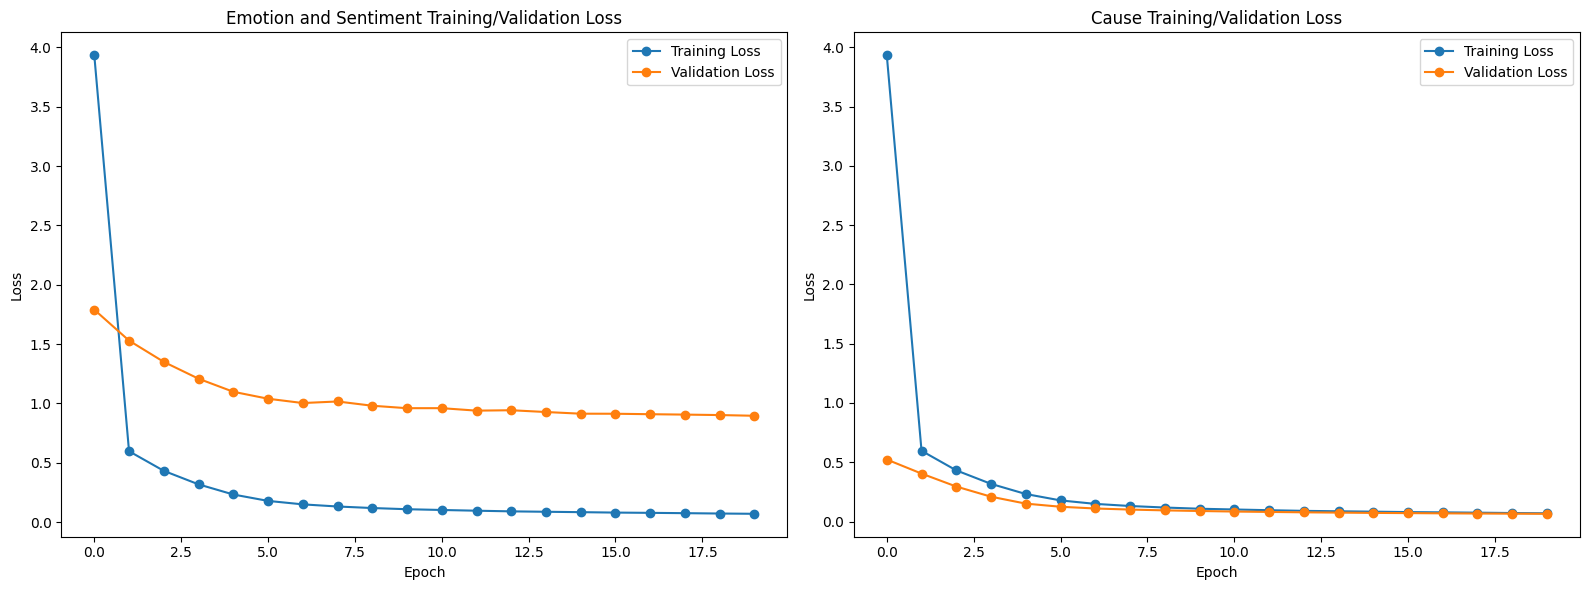

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first loss history
axes[0].plot(train_losses, label='Training Loss', marker='o')
axes[0].plot(val_losses, label='Validation Loss', marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Emotion and Sentiment Training/Validation Loss')
axes[0].legend()
axes[0].grid(False)

# Plotting the second loss history
axes[1].plot(train_cause_losses, label='Training Loss', marker='o')
axes[1].plot(val_cause_losses, label='Validation Loss', marker='o')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Cause Training/Validation Loss')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()
plt.show()


## Model 2 Architechture

In [72]:
# import torch
# import torch.nn as nn
# from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
# import copy 

# class MultiTaskModel_2(nn.Module):
#     def __init__(self, base_model, hidden_size=768, num_classes_sent=3, num_classes_emo=5):
#         super(MultiTaskModel_2, self).__init__()
#         self.base_model = base_model
        
#         # Bidirectional LSTM layer
#         self.LSTM = nn.LSTM(hidden_size, 384, bidirectional=True, batch_first=True, dropout=0.3)
        
#         # Auxiliary Task - Sentiment Detection
#         self.sent_classifier = nn.Linear(1536, num_classes_sent)
        
#         # Auxiliary Task - Emotion Detection
#         self.emo_classifier = nn.Linear(1536, num_classes_emo)

#     def forward(self, input_ids, attention_mask):
#         # embeddings
#         outputs = self.base_model.bert(input_ids=input_ids, attention_mask=attention_mask)
#         last_hidden_state = outputs.last_hidden_state
        
#         last_hidden_states = outputs.last_hidden_state

#         # Bidirectional LSTM layer
#         packed_sequence = pack_padded_sequence(last_hidden_states, attention_mask.sum(dim=1).cpu(), batch_first=True, enforce_sorted=False)
#         lstm_output, _ = self.LSTM(packed_sequence)
#         lstm_output, _ = pad_packed_sequence(lstm_output, batch_first=True)
        
#         # Concatenate the output of the last hidden states and LSTM
#         concatenated_output = torch.cat((last_hidden_states[:, 0, :], lstm_output[:, -1, :]), dim=1)
#         # Predictions for each task
#         sent_logits = self.sent_classifier(concatenated_output)
#         emo_logits = self.emo_classifier(concatenated_output)

#         return emo_logits, sent_logits

# # Model 2
# model_2 = MultiTaskModel_2(base_model)

# emotion_criterion = FocalLoss()
# sentiment_criterion = FocalLoss()

# optimizer = optim.Adam(model_2.parameters(), lr=2e-5)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model_2.to(device)


In [73]:
# num_epochs = 10
# train_losses = []
# val_losses = []

# for epoch in range(num_epochs):
#     model_2.train()
#     total_loss = 0
#     total_emotion_correct = 0
#     total_sentiment_correct = 0
#     total_samples = 0

#     for batch in train_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         emotion_labels = batch['emotion'].to(device)
#         sentiment_labels = batch['sentiment'].to(device)

#         optimizer.zero_grad()
#         emotion_logits, sentiment_logits = model_2(input_ids, attention_mask)

#         emotion_loss = emotion_criterion(emotion_logits, emotion_labels)
#         sentiment_loss = sentiment_criterion(sentiment_logits, sentiment_labels)

#         loss = 1.5*emotion_loss + 0.6*sentiment_loss
#         total_loss += loss.item()

#         # Calculate accuracy
#         _, emotion_predicted = torch.max(emotion_logits, 1)
#         _, sentiment_predicted = torch.max(sentiment_logits, 1)
        
#         total_emotion_correct += (emotion_predicted == emotion_labels).sum().item()
#         total_sentiment_correct += (sentiment_predicted == sentiment_labels).sum().item()
#         total_samples += emotion_labels.size(0)

#         loss.backward()
#         optimizer.step()

#     avg_train_loss = total_loss / len(train_loader)
#     avg_emotion_accuracy = total_emotion_correct / total_samples
#     avg_sentiment_accuracy = total_sentiment_correct / total_samples
#     train_losses.append(avg_train_loss)
    
#     # Validation
#     model_2.eval()
#     val_loss = 0
#     val_emotion_correct = 0
#     val_sentiment_correct = 0
#     val_samples = 0

#     for batch in val_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         emotion_labels = batch['emotion'].to(device)
#         sentiment_labels = batch['sentiment'].to(device)

#         with torch.no_grad():
#             emotion_logits, sentiment_logits = model_2(input_ids, attention_mask)

#             emotion_loss = emotion_criterion(emotion_logits, emotion_labels)
#             sentiment_loss = sentiment_criterion(sentiment_logits, sentiment_labels)

#             loss = 1.5*emotion_loss + 0.6*sentiment_loss
#             val_loss += loss.item()

#             # Calculate accuracy
#             _, emotion_predicted = torch.max(emotion_logits, 1)
#             _, sentiment_predicted = torch.max(sentiment_logits, 1)
            
#             val_emotion_correct += (emotion_predicted == emotion_labels).sum().item()
#             val_sentiment_correct += (sentiment_predicted == sentiment_labels).sum().item()
#             val_samples += emotion_labels.size(0)

#     avg_val_loss = val_loss / len(val_loader)
#     avg_val_emotion_accuracy = val_emotion_correct / val_samples
#     avg_val_sentiment_accuracy = val_sentiment_correct / val_samples
#     val_losses.append(avg_val_loss)
    
#     print(f'Epoch [{epoch + 1}/{num_epochs}], '
#           f'Training Loss: {avg_train_loss:.4f}, '
#           f'Training Emotion Accuracy: {avg_emotion_accuracy:.4f}, '
#           f'Training Sentiment Accuracy: {avg_sentiment_accuracy:.4f}, '
#           f'Validation Loss: {avg_val_loss:.4f}, '
#           f'Validation Emotion Accuracy: {avg_val_emotion_accuracy:.4f}, '
#           f'Validation Sentiment Accuracy: {avg_val_sentiment_accuracy:.4f}')


In [74]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

# # Assuming you have a dataset 'train_dataset' and labels 'train_labels'
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Your training and validation loops will be embedded in the cross-validation loop
# for fold, (train_idx, val_idx) in enumerate(kf.split(total_dataset_loader)):
#     train_data = [train_dataset[i] for i in train_idx]
#     val_data = [train_dataset[i] for i in val_idx]

#     train_loader_kf = DataLoader(train_data, batch_size=batch_size, shuffle=True)
#     val_loader_kf = DataLoader(val_data, batch_size=batch_size, shuffle=False)

#     model = MultiTaskModel(base_model)
#     optimizer = optim.Adam(model.parameters(), lr=2e-5)
#     model.to(device)

#     num_epochs = 20
#     train_losses = []
#     val_losses = []

#     for epoch in range(num_epochs):
#         model.train()
#         total_loss = 0
#         total_emotion_correct = 0
#         total_sentiment_correct = 0
#         total_samples = 0

#         for batch in train_loader_kf:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             emotion_labels = batch['emotion'].to(device)
#             sentiment_labels = batch['sentiment'].to(device)

#             optimizer.zero_grad()
#             emotion_logits, sentiment_logits = model(input_ids, attention_mask)

#             emotion_loss = emotion_criterion(emotion_logits, emotion_labels)
#             sentiment_loss = sentiment_criterion(sentiment_logits, sentiment_labels)

#             loss = 0.5*emotion_loss + 0.5*sentiment_loss
#             total_loss += loss.item()

#             # Calculate accuracy
#             _, emotion_predicted = torch.max(emotion_logits, 1)
#             _, sentiment_predicted = torch.max(sentiment_logits, 1)

#             total_emotion_correct += (emotion_predicted == emotion_labels).sum().item()
#             total_sentiment_correct += (sentiment_predicted == sentiment_labels).sum().item()
#             total_samples += emotion_labels.size(0)

#             loss.backward()
#             optimizer.step()

#         avg_train_loss = total_loss / len(train_loader_kf)
#         avg_emotion_accuracy = total_emotion_correct / total_samples
#         avg_sentiment_accuracy = total_sentiment_correct / total_samples
#         train_losses.append(avg_train_loss)

#         # Validation
#         model.eval()
#         val_loss = 0
#         val_emotion_correct = 0
#         val_sentiment_correct = 0
#         val_samples = 0

#         for batch in val_loader_kf:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             emotion_labels = batch['emotion'].to(device)
#             sentiment_labels = batch['sentiment'].to(device)

#             with torch.no_grad():
#                 emotion_logits, sentiment_logits = model(input_ids, attention_mask)

#                 emotion_loss = emotion_criterion(emotion_logits, emotion_labels)
#                 sentiment_loss = sentiment_criterion(sentiment_logits, sentiment_labels)

#                 loss = 0.5*emotion_loss + 0.5*sentiment_loss
#                 val_loss += loss.item()

#                 # Calculate accuracy
#                 _, emotion_predicted = torch.max(emotion_logits, 1)
#                 _, sentiment_predicted = torch.max(sentiment_logits, 1)

#                 val_emotion_correct += (emotion_predicted == emotion_labels).sum().item()
#                 val_sentiment_correct += (sentiment_predicted == sentiment_labels).sum().item()
#                 val_samples += emotion_labels.size(0)

#         avg_val_loss = val_loss / len(val_loader_kf)
#         avg_val_emotion_accuracy = val_emotion_correct / val_samples
#         avg_val_sentiment_accuracy = val_sentiment_correct / val_samples
#         val_losses.append(avg_val_loss)

#         print(f'Epoch [{epoch + 1}/{num_epochs}], '
#               f'Training Loss: {avg_train_loss:.4f}, '
#               f'Training Emotion Accuracy: {avg_emotion_accuracy:.4f}, '
#               f'Training Sentiment Accuracy: {avg_sentiment_accuracy:.4f}, '
#               f'Validation Loss: {avg_val_loss:.4f}, '
#               f'Validation Emotion Accuracy: {avg_val_emotion_accuracy:.4f}, '
#               f'Validation Sentiment Accuracy: {avg_val_sentiment_accuracy:.4f}')


In [75]:
# Save the trained model
torch.save(model.state_dict(), 'multi_task_model.pth')

## Prediction

In [79]:
import torch

def predict_realtime(model, tokenizer, input_text):
    # Tokenize and convert input_text to tensor
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True)
    
    whitelist = input_text.split()
    whitelist_ids = [tokenizer.encode(word)[0] for word in whitelist]
    bad_words_ids=[[id] for id in range(tokenizer.vocab_size) if id not in whitelist_ids]


    # Move the tensors to GPU if available
    inputs = {key: value.to('cuda') for key, value in inputs.items()}
    
    # Forward pass through the model
    with torch.no_grad():
        model.eval()
        emotion_logits, sentiment_logits = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], selected_text_id=None, selected_text_attn_mask=None )  

    # Post-process the logits to get predictions
    emotion_predictions = torch.argmax(emotion_logits, dim=1).cpu().numpy()
    sentiment_predictions = torch.argmax(sentiment_logits, dim=1).cpu().numpy()
    
    with torch.no_grad():
        # Generate cause using the decoder
#         encoder_output = model.enc_dec_model.encoder(
#                                         input_ids=inputs["input_ids"],
#                                         attention_mask=inputs["attention_mask"],
#                                     )
#         encoder_embd = encoder_output.last_hidden_state
        
#         cause_ids = model.enc_dec_model.decoder.generate(
#                                     encoder_hidden_states=encoder_embd,
#                                     encoder_attention_mask=inputs["attention_mask"]
#                                 )
        cause_ids = model.enc_dec_model.generate(
                    input_ids=inputs["input_ids"],
                    attention_mask=inputs["attention_mask"],
                    bos_token_id=tokenizer.cls_token_id,  # bos_token_id
#                     num_beams=6,
#                     num_return_sequences=4,
#                     do_sample=True,
#                     min_length=2,
#                     max_length=15,
#                     top_p=0.9,
#                     top_k=2000,
#                     repetition_penalty=2.0,
#                     length_penalty=1.0,
                    temperature=0.9,
#                     no_repeat_ngram_size=2,
#                     bad_words_ids = bad_words_ids
                )

    # Decode the cause_ids to text
    cause_text = tokenizer.batch_decode(cause_ids, skip_special_tokens=True)[0]
    
    return emotion_predictions, sentiment_predictions, cause_text


    
# Example usage
idx = 14
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Input Text:", input_text)
print("Real Emotion Predictions: ", emotion)
print("Real Sentiment Predictions: ", sentiments)
print("Real Cause Predictions: ", selected_text)


print("Predicted Emotion Predictions: ", emotion_preds)
print("Predicted Sentiment Predictions: ", sentiment_preds)
print("Predicted Cause Predictions: ", cause)

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1128: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Input Text: an acquisition of teliasonera would be france telecom  s biggest since its purchase of orange plc for  8 billion     1 billion   and would create the world  s fourth largest telecom company behind at t inc    verizon communications inc  and ntt corp  of japan
Real Emotion Predictions:  4
Real Sentiment Predictions:  1
Real Cause Predictions:  no-cause
Predicted Emotion Predictions:  [4]
Predicted Sentiment Predictions:  [1]
Predicted Cause Predictions:  no-cause


In [80]:
idx = 1
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  avoid
Predicted Cause Predictions:  avoid


In [81]:
idx = 2
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  Rallies over 4% as US court rejects stay request on Copaxone.
Predicted Cause Predictions:  Rallies over 4% as US court rejects stay request on Copaxone.


In [82]:
idx = 3
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  The right time to enter into stocks, says Prakash Diwan.
Predicted Cause Predictions:  The right time to enter into IT stocks.


In [83]:
idx = 4
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  no-cause
Predicted Cause Predictions:  no-cause


In [84]:
idx = 5
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  To benefit from the peak construction season, strong demand.
Predicted Cause Predictions:  Profits from peak construction season, strong demand.


In [85]:
idx = 5
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  To benefit from the peak construction season, strong demand.
Predicted Cause Predictions:  Profits from peak construction season, strong demand.


In [86]:
idx = 6
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  mustard
Predicted Cause Predictions:  mustard seed futures


In [87]:
idx = 7
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  crude palm oil futures rise
Predicted Cause Predictions:  crude palm oil futures rise


In [88]:
idx = 8
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  gain
Predicted Cause Predictions:  gain


In [89]:
idx = 8
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  gain
Predicted Cause Predictions:  gain


In [90]:
idx = 9
input_text = val_sentences.iloc[idx]
emotion = val_emotion.iloc[idx]
sentiments = val_sentiments.iloc[idx]
selected_text = val_selected_text.iloc[idx]
emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

print("Real Cause Predictions: ", selected_text)
print("Predicted Cause Predictions: ", cause)

Real Cause Predictions:  no-cause
Predicted Cause Predictions:  no-cause


# Matrices

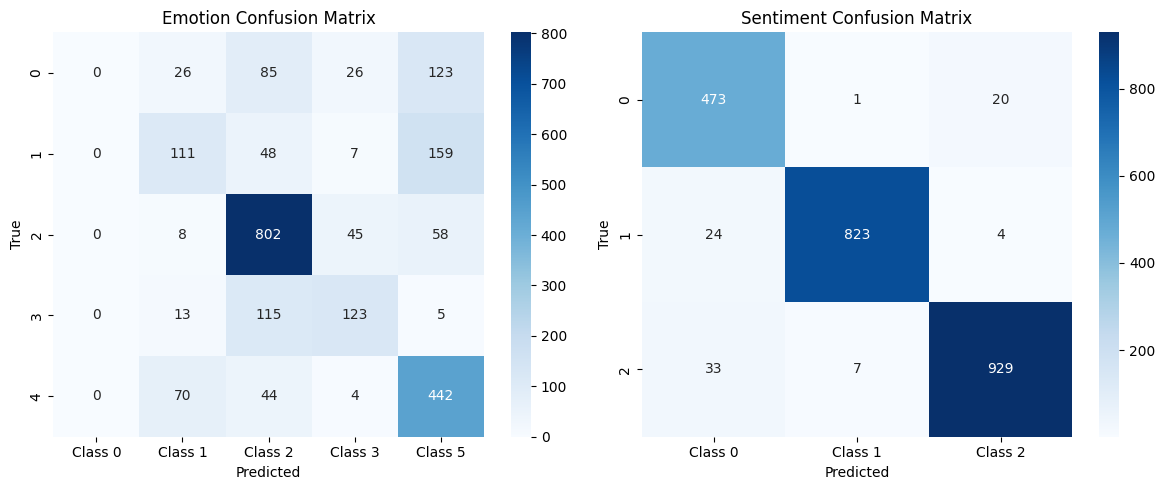

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... Your existing code ...

# After training and validation loops
model.eval()
all_emotion_labels = []
all_emotion_predictions = []
all_sentiment_labels = []
all_sentiment_predictions = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        emotion_labels = batch['emotion'].to(device)
        sentiment_labels = batch['sentiment'].to(device)

        emotion_logits, sentiment_logits = model(input_ids=input_ids, attention_mask=attention_mask, selected_text_id=None, selected_text_attn_mask=None )  

        # Post-process the logits to get predictions
        emotion_predictions = torch.argmax(emotion_logits, dim=1).cpu().numpy()
        sentiment_predictions = torch.argmax(sentiment_logits, dim=1).cpu().numpy()
    
    

        _, emotion_predicted = torch.max(emotion_logits, 1)
        _, sentiment_predicted = torch.max(sentiment_logits, 1)

        all_emotion_labels.extend(emotion_labels.cpu().numpy())
        all_emotion_predictions.extend(emotion_predicted.cpu().numpy())
        all_sentiment_labels.extend(sentiment_labels.cpu().numpy())
        all_sentiment_predictions.extend(sentiment_predicted.cpu().numpy())

# Calculate confusion matrices
emotion_cm = confusion_matrix(all_emotion_labels, all_emotion_predictions)
sentiment_cm = confusion_matrix(all_sentiment_labels, all_sentiment_predictions)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(emotion_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 5'])
plt.title('Emotion Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(sentiment_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Sentiment Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


In [92]:
from sklearn.metrics import classification_report

# Print classification reports
emotion_report = classification_report(all_emotion_labels, all_emotion_predictions, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 5'])
sentiment_report = classification_report(all_sentiment_labels, all_sentiment_predictions, target_names=['Class 0', 'Class 1', 'Class 2'])

# Print classification reports
print("Emotion Classification Report:")
print(emotion_report)

print("\nSentiment Classification Report:")
print(sentiment_report)


Emotion Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       260
     Class 1       0.49      0.34      0.40       325
     Class 2       0.73      0.88      0.80       913
     Class 3       0.60      0.48      0.53       256
     Class 5       0.56      0.79      0.66       560

    accuracy                           0.64      2314
   macro avg       0.48      0.50      0.48      2314
weighted avg       0.56      0.64      0.59      2314


Sentiment Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.96      0.92       494
     Class 1       0.99      0.97      0.98       851
     Class 2       0.97      0.96      0.97       969

    accuracy                           0.96      2314
   macro avg       0.95      0.96      0.96      2314
weighted avg       0.96      0.96      0.96      2314



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
def hamming_distance_sentence_lists(sentences1, sentences2):
    # Ensure both lists have the same length
    length = max(len(sentences1), len(sentences2))
    sentences1 += [''] * (length - len(sentences1))
    sentences2 += [''] * (length - len(sentences2))

    # Calculate Hamming distance for each pair of sentences
    distances = [hamming_distance(s1, s2) for s1, s2 in zip(sentences1, sentences2)]
    return distances

def hamming_distance(sentence1, sentence2):
    # Ensure both sentences have the same length
    length = max(len(sentence1), len(sentence2))
    sentence1 = sentence1.ljust(length)
    sentence2 = sentence2.ljust(length)

    # Calculate Hamming distance
    distance = sum(c1 != c2 for c1, c2 in zip(sentence1, sentence2))
    return distance

# Example usage
sentences_list1 = ["Hello, world!", "How are you?", "Python is fun"]
sentences_list2 = ["Hollo, world?", "How is it going?", "Java is cool"]

distances = hamming_distance_sentence_lists(sentences_list1, sentences_list2)

for i, distance in enumerate(distances):
    print(f"Hamming distance for sentences {i + 1}: {distance}")


Hamming distance for sentences 1: 2
Hamming distance for sentences 2: 12
Hamming distance for sentences 3: 13


In [94]:
real_causes = []
predicted_causes = []

# Iterate through all entries
for idx in range(len(val_sentences)):
    input_text = val_sentences.iloc[idx]
    emotion = val_emotion.iloc[idx]
    sentiments = val_sentiments.iloc[idx]
    selected_text = val_selected_text.iloc[idx]

    # Assuming you have a predict_realtime function
    emotion_preds, sentiment_preds, cause = predict_realtime(model, tokenizer, input_text)

    # Append real and predicted causes to their respective lists
    real_causes.append(selected_text)
    predicted_causes.append(cause)


/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1128: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [95]:
real_causes[:50], predicted_causes[:50] 

(['no-cause',
  'avoid',
  'Rallies over 4% as US court rejects stay request on Copaxone.',
  'The right time to enter into stocks, says Prakash Diwan.',
  'no-cause',
  'To benefit from the peak construction season, strong demand.',
  'mustard',
  'crude palm oil futures rise',
  'gain',
  'no-cause',
  'no-cause',
  'no-cause',
  'Considered an interesting stock to hold.',
  'no-cause',
  'no-cause',
  'stake in infosys to 25 garner',
  "Rises on Federal Reserve's view, industrial data, GPIF news.",
  'no-cause',
  'decline',
  'low',
  'no-cause',
  'Lifted on talk of a Rs 1 billion defense deal.',
  'Still ripe for traders in the power space, says Harendra Kumar.',
  'Strengthen on increased industrial demand.',
  'sell',
  'Dhanteras gold and silver sales to surge on lower prices.',
  'no-cause',
  'no-cause',
  'no-cause',
  'no-cause',
  'no-cause',
  'fraud financial distress',
  'nifty',
  'Look more attractive in the short term, say experts.',
  'hit',
  'force motors soars',

In [96]:

# Calculate Hamming distance between the two lists
hamming_distances = [hamming_distance(real, predicted) for real, predicted in zip(real_causes, predicted_causes)]

# Calculate average Hamming distance
average_distance = sum(hamming_distances) / len(hamming_distances)
print(f"Average Hamming Distance: {average_distance}")

Average Hamming Distance: 11.71218668971478


In [97]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union if union != 0 else 0
    return similarity

# Convert each list of causes to sets
real_causes_sets = [set(cause.split()) for cause in real_causes]
predicted_causes_sets = [set(cause.split()) for cause in predicted_causes]

# Calculate Jaccard similarity for each pair
jaccard_similarities = [jaccard_similarity(real_set, predicted_set) for real_set, predicted_set in zip(real_causes_sets, predicted_causes_sets)]

# Calculate average Jaccard similarity
average_similarity = sum(jaccard_similarities) / len(jaccard_similarities)
print(f"Average Jaccard Similarity: {average_similarity}")


Average Jaccard Similarity: 0.7105684886508965


In [98]:
def longest_common_subsequence(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]

def ratcliff_obershelp_similarity(str1, str2):
    lcs_length = longest_common_subsequence(str1, str2)
    similarity = 2 * lcs_length / (len(str1) + len(str2)) if len(str1) + len(str2) != 0 else 0
    return similarity

# Convert each list of causes to strings
real_causes_strings = [" ".join(cause.split()) for cause in real_causes]
predicted_causes_strings = [" ".join(cause.split()) for cause in predicted_causes]

# Calculate Ratcliff/Obershelp similarity for each pair
ratcliff_obershelp_similarities = [ratcliff_obershelp_similarity(real, predicted) for real, predicted in zip(real_causes_strings, predicted_causes_strings)]

# Calculate average Ratcliff/Obershelp similarity
average_similarity_ro = sum(ratcliff_obershelp_similarities) / len(ratcliff_obershelp_similarities)
print(f"Average Ratcliff/Obershelp Similarity: {average_similarity_ro}")


Average Ratcliff/Obershelp Similarity: 0.796967915577922


In [99]:
!pip install bert_score rouge
!pip install nltk==3.7

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.9 MB/s eta 0:00:00


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.7 which is incompatible.


In [100]:
import bert_score

def calculate_bert_score(real_causes, predicted_causes):
    _, _, bert_scores = bert_score.score(predicted_causes, real_causes, lang="en")
    average_bert_score = bert_scores.mean().item()
    return average_bert_score

bert_score = calculate_bert_score(real_causes, predicted_causes)
print(f"BERTScore: {bert_score}")

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: 0.9493383765220642


In [101]:
from nltk.translate.meteor_score import meteor_score

def meteor_score(real_causes, predicted_captions):
    total = 0
    for i in range(len(real_causes)):
        reference_sentences = list([real_causes[i].split()]) 
        candidate_sentences = predicted_causes[i].split()
        score = nltk.translate.meteor_score.meteor_score(references=reference_sentences, hypothesis=candidate_sentences, )
        total += score
    avg = total/len(real_causes)
    return avg


avg_meteor_score = meteor_score(real_causes, predicted_causes)
print(f"Average meteor score: {avg_meteor_score}")

Average meteor score: 0.5241032326874957


In [102]:
from rouge import Rouge

def calculate_rouge_scores(ground_truth_sentences, predicted_sentences):
    rouge = Rouge()
    scores = rouge.get_scores(predicted_sentences, ground_truth_sentences, avg=True)
    return scores

rouge_scores = calculate_rouge_scores(predicted_causes, real_causes)
print(rouge_scores)


{'rouge-1': {'r': 0.7660418545250005, 'p': 0.8070462954597856, 'f': 0.7567947993061556}, 'rouge-2': {'r': 0.2141274861853563, 'p': 0.23337659087804238, 'f': 0.2131155039506304}, 'rouge-l': {'r': 0.7657491229120442, 'p': 0.8065532491802224, 'f': 0.7564316648894343}}


In [103]:
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu

# Function to calculate BLEU scores for 1-gram, 2-gram, 3-gram, and 4-gram
def calculate_bleu_scores(real_causes, predicted_causes):
    # Convert each cause to a list of words
    real_causes_tokens = [cause.split() for cause in real_causes]
    predicted_causes_tokens = [cause.split() for cause in predicted_causes]

    # Calculate BLEU scores
    bleu_1 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(1, 0, 0, 0))
    bleu_2 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(0.5, 0.5, 0, 0))
    bleu_3 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(0.33, 0.33, 0.33, 0))
    bleu_4 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(0.25, 0.25, 0.25, 0.25))

    return bleu_1, bleu_2, bleu_3, bleu_4

# Replace real_causes and predicted_causes with your actual lists
bleu_1, bleu_2, bleu_3, bleu_4 = calculate_bleu_scores(real_causes, predicted_causes)

# Print the results
print(f"BLEU- 1 Score: {bleu_1}")
print(f"BLEU- 1,2 Score: {bleu_2}")
print(f"BLEU- 1,2,3 Score: {bleu_3}")
print(f"BLEU- 1,2,3,4 Score: {bleu_4}")


BLEU- 1 Score: 0.6759983532317826
BLEU- 1,2 Score: 0.5475746335030802
BLEU- 1,2,3 Score: 0.4878702615281272
BLEU- 1,2,3,4 Score: 0.43821589624149354


In [104]:
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu

# Function to calculate BLEU scores for 1-gram, 2-gram, 3-gram, and 4-gram
def calculate_bleu_scores(real_causes, predicted_causes):
    # Convert each cause to a list of words
    real_causes_tokens = [cause.split() for cause in real_causes]
    predicted_causes_tokens = [cause.split() for cause in predicted_causes]

    # Calculate BLEU scores
    bleu_1 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(1, 0, 0, 0))
    bleu_2 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(0, 1, 0, 0))
    bleu_3 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(0, 0, 1, 0))
    bleu_4 = corpus_bleu([[ref] for ref in real_causes_tokens], predicted_causes_tokens, weights=(0, 0, 0, 1))

    return bleu_1, bleu_2, bleu_3, bleu_4

# Replace real_causes and predicted_causes with your actual lists
bleu_1, bleu_2, bleu_3, bleu_4 = calculate_bleu_scores(real_causes, predicted_causes)

# Print the results
print(f"BLEU-1 Score: {bleu_1}")
print(f"BLEU-2 Score: {bleu_2}")
print(f"BLEU-3 Score: {bleu_3}")
print(f"BLEU-4 Score: {bleu_4}")


BLEU-1 Score: 0.6759983532317826
BLEU-2 Score: 0.4435483870967742
BLEU-3 Score: 0.3789492688210868
BLEU-4 Score: 0.32455237703231116
